# Control Mappings

In this notebook, two different approaches to generate mappings that serve as sort of negative controls will be generated. Please make sure that you have run [Mapping notebook](2_mapping.ipynb) before executing this one.

In [1]:
import nabo
import numpy as np

/home/parashar/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
poster_graph = nabo.Graph()
poster_graph.load_from_gml('/home/parashar/Data/Nabo_stage/data/MLL_ENL/nabo/hvg_graph_poster.gml')

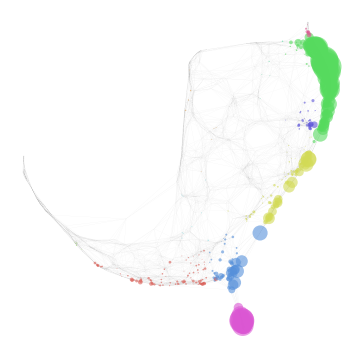

GraphPlot of 2596 nodes

In [3]:
mapping = nabo.Mapping('/home/parashar/mapping_deleteme.h5', 'WT',
                       '/home/parashar/Data/Nabo_stage/data/MLL_ENL/nabo/hvg_pca_WT.h5', 'data')
mapping.set_parameters(15, 11, np.inf, 500)
mapping.make_ref_graph()
mapping.map_target('ME', '/home/parashar/Data/Nabo_stage/data/MLL_ENL/nabo/hvg_pca_ME.h5', 'data')
hvg_graph = nabo.Graph()
hvg_graph.load_from_h5('/home/parashar/mapping_deleteme.h5', 'WT', 'reference')
hvg_graph.make_clusters(12)
hvg_graph.load_from_h5('/home/parashar/mapping_deleteme.h5', 'ME', 'target')
hvg_graph.import_layout(poster_graph)
nabo.GraphPlot(hvg_graph, vc_attr='cluster', vs=hvg_graph.get_mapping_score('ME'))

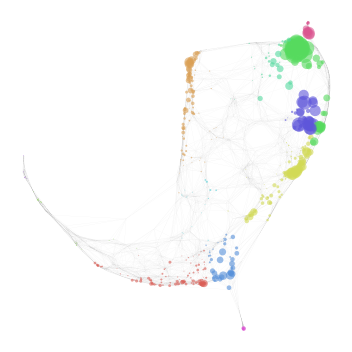

GraphPlot of 3778 nodes

In [4]:
high_score_ref_nodes = hvg_graph.get_mapping_score(
    'ME', min_score=1, sorted_names_only=True, remove_suffix=True)
mapping.map_target('MEnull', '/home/parashar/Data/Nabo_stage/data/MLL_ENL/nabo/hvg_pca_ME.h5',
                   'data', ignore_ref_cells=high_score_ref_nodes)
hvg_graph.load_from_h5('/home/parashar/mapping_deleteme.h5', 'MEnull', 'target')

null_mapping_score = hvg_graph.get_mapping_score('MEnull')
nabo.GraphPlot(hvg_graph, vc_attr='cluster', vs=null_mapping_score)
# me_null_cluster_scores = hvg_graph.get_mapping_score('MEnull', by_cluster=True)
# nabo.plot_cluster_scores(me_null_cluster_scores)
# me_null_target_clusters = hvg_graph.classify_target('MEnull', ret_counts=True)
# nabo.plot_target_class_counts(me_null_target_clusters)

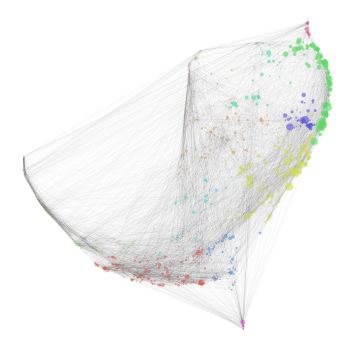

GraphPlot of 2596 nodes

In [5]:
lvg_mapping = nabo.Mapping('/home/parashar/lvg_mapping_deleteme.h5', 'WT',
                           '/home/parashar/Data/Nabo_stage/data/MLL_ENL/nabo/lvg_pca_WT.h5', 'data')
lvg_mapping.set_parameters(15, 11, np.inf, 500)
lvg_mapping.make_ref_graph()
lvg_mapping.map_target('ME', '/home/parashar/Data/Nabo_stage/data/MLL_ENL/nabo/lvg_pca_ME.h5', 'data')
lvg_graph = nabo.Graph()
lvg_graph.load_from_h5('/home/parashar/lvg_mapping_deleteme.h5', 'WT', 'reference')
lvg_graph.load_from_h5('/home/parashar/lvg_mapping_deleteme.h5', 'ME', 'target')

lvg_graph.import_clusters(hvg_graph.clusters)
lvg_graph.import_layout(hvg_graph)

lvg_mapping_score = lvg_graph.get_mapping_score('ME')
nabo.GraphPlot(lvg_graph, vc_attr='cluster', vs=lvg_mapping_score)

# lvg_cluster_scores = lvg_graph.get_mapping_score('ME', by_cluster=True)
# nabo.plot_cluster_scores(lvg_cluster_scores)
# lvg_target_clusters = lvg_graph.classify_target('ME', ret_counts=True)
# nabo.plot_target_class_counts(lvg_target_clusters)

In [6]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [7]:
a = h5py.File('/home/parashar/mapping_deleteme.h5')
b = h5py.File('/home/parashar/lvg_mapping_deleteme.h5')

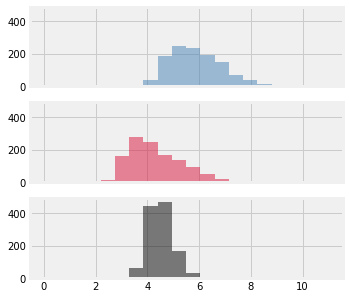

In [8]:
def get_median_distance(h5, grp):
    g1, g2 = "%s_dist" % grp, "%s_sortedDist" % grp
    ds = []
    for i in h5[g1]:
        ds.append(np.median(h5[g1][i]) - h5[g1][i][h5[g2][i][0]])
    return ds

fig, axis = plt.subplots(3, 1, figsize=(5, 5), sharex=True, sharey=True)

axis[0].hist(get_median_distance(a, 'ME'), range=(0, 11), bins=20, alpha=0.5, color='steelblue')
axis[1].hist(get_median_distance(a, 'MEnull'), range=(0, 11), bins=20, alpha=0.5, color='crimson')
axis[2].hist(get_median_distance(b, 'ME'), range=(0, 11), bins=20, alpha=0.5, color='black')
plt.show()

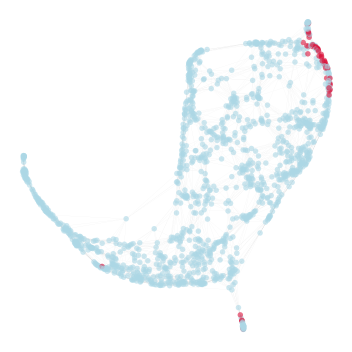

(243, 46)

In [9]:
ref_cells = {n:x for n,x in enumerate(mapping.refCells)}
cells = []
for i in a['ME_dist']:
    d = np.median(a['ME_dist'][i]) - a['ME_dist'][i][a['ME_sortedDist'][i][0]]
    if d > 7.5:
        cells.append(ref_cells[a['ME_sortedDist'][i][0]] + '_WT')
c = {x:'crimson' if x in cells else 'lightblue' for x in hvg_graph.refNodes}
nabo.GraphPlot(hvg_graph, vc=c)
len(cells), len(set(cells))

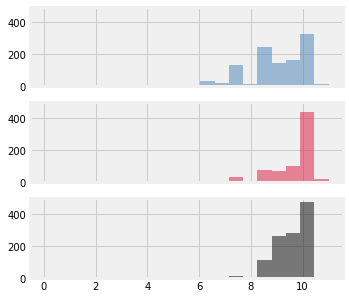

In [35]:
def get_least_distance(h5, grp):
    g1, g2 = "%s_dist" % grp, "%s_sortedDist" % grp
    ds = []
    for i in h5[g1]:
        ds.append(h5[g1][i][h5[g2][i][0]])
    return ds

fig, axis = plt.subplots(3, 1, figsize=(5, 5), sharex=True, sharey=True)

axis[0].hist(get_least_distance(a, 'ME'), range=(0, 11), bins=20, alpha=0.5, color='steelblue')
axis[1].hist(get_least_distance(a, 'MEnull'), range=(0, 11), bins=20, alpha=0.5, color='crimson')
axis[2].hist(get_least_distance(b, 'ME'), range=(0, 11), bins=20, alpha=0.5, color='black')
plt.show()

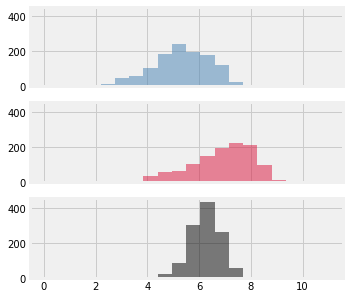

In [10]:
def get_least_distance(h5, grp):
    g1, g2 = "%s_dist" % grp, "%s_sortedDist" % grp
    ds = []
    for i in h5[g1]:
        ds.append(h5[g1][i][h5[g2][i][0]])
    return ds

fig, axis = plt.subplots(3, 1, figsize=(5, 5), sharex=True, sharey=True)

axis[0].hist(get_least_distance(a, 'ME'), range=(0, 11), bins=20, alpha=0.5, color='steelblue')
axis[1].hist(get_least_distance(a, 'MEnull'), range=(0, 11), bins=20, alpha=0.5, color='crimson')
axis[2].hist(get_least_distance(b, 'ME'), range=(0, 11), bins=20, alpha=0.5, color='black')
plt.show()

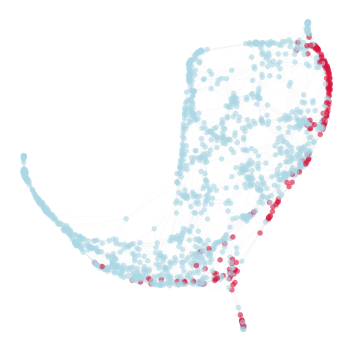

(827, 174)

In [11]:
ref_cells = {n:x for n,x in enumerate(mapping.refCells)}
cells = []
for i in a['ME_dist']:   
    if a['ME_dist'][i][a['ME_sortedDist'][i][0]] < 6:
        cells.append(ref_cells[a['ME_sortedDist'][i][0]] + '_WT')
c = {x:'crimson' if x in cells else 'lightblue' for x in hvg_graph.refNodes}
nabo.GraphPlot(hvg_graph, vc=c)
len(cells), len(set(cells))